In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

m_1 = 1
m_2 = 0.5
c = 1
omega = 1
a = 1

k_1 = np.arcsin(omega/2 * np.sqrt(m_1/c)) * 2 / a

In [2]:
particles_num = np.arange(-100, 100, a)
particles_mass = np.array([m_1 if i < 0 else m_2 for i in particles_num])

In [3]:
particles_disp = np.array([0]*len(particles_num), dtype=float)
particles_vel = np.array([0]*len(particles_num), dtype=float)

beta = 0.1
for i, num in enumerate(particles_num):
    if num < 0:
        particles_disp[i] = 1 * np.exp(-beta**2/2 * (num + 25)**2) * np.sin(num * k_1)
        particles_vel[i] = -1 * np.exp(-beta**2/2 * (num + 25)**2) * (omega * np.cos(k_1*num) - beta**2*np.sqrt(c/m_1)*np.cos(k_1*a/2)*(num+25)*np.sin(num * k_1))

0.8488769518394553


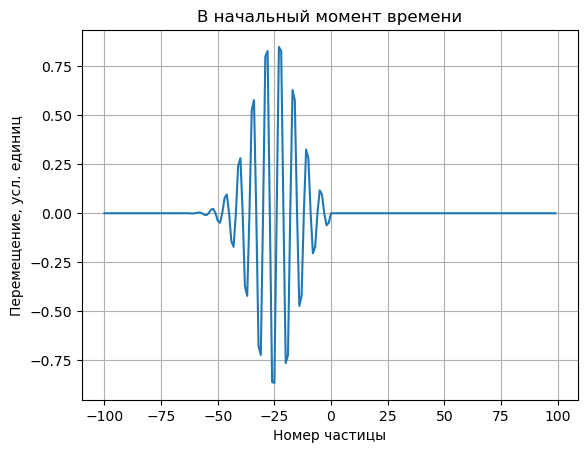

In [4]:
plt.plot(particles_num, particles_disp)
plt.title(f'В начальный момент времени')
plt.xlabel('Номер частицы')
plt.ylabel('Перемещение, усл. единиц')
plt.grid()
print(max(particles_disp))

In [5]:
dt = 0.005
t_max = 70
times = np.arange(0, t_max, dt)

In [6]:
#particles_history = np.zeros(shape=(1,len(particles_num)))

for t in tqdm(times):
    for p in particles_num:
        ind = np.where(particles_num == p)[0][0]
        if ind == 0:
            #particles_disp[ind] = np.sin(omega*t)
            #particles_vel[ind] = np.cos(omega*t)
            pass
        elif ind == len(particles_num) - 1:
            particles_vel[ind] += c/particles_mass[ind]*(particles_disp[ind-1]-2*particles_disp[ind])*dt
            particles_disp[ind] += particles_vel[ind] * dt
        else:
            particles_vel[ind] += c/particles_mass[ind]*(particles_disp[ind-1]+particles_disp[ind+1]-2*particles_disp[ind])*dt
            particles_disp[ind] += particles_vel[ind] * dt
    #particles_history = np.vstack((particles_history, particles_disp))

100%|██████████| 14000/14000 [00:10<00:00, 1320.13it/s]


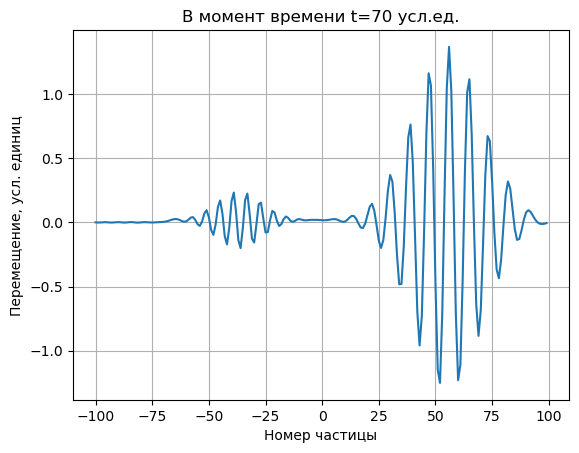

In [7]:
plt.plot(particles_num, particles_disp)
plt.title(f'В момент времени t={t_max} усл.ед.')
plt.xlabel('Номер частицы')
plt.ylabel('Перемещение, усл. единиц')
plt.grid()

In [8]:
#plt.plot(particles_history[:,40])